***Heart Attack Prediction***


Data Dictionary
* age - Age of the patient
* sex - Sex of the patient
* cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
* trtbps - Resting blood pressure (in mm Hg)
* chol - Cholestoral in mg/dl fetched via BMI sensor
* fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
* restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
* thalachh - Maximum heart rate achieved
* oldpeak - Previous peak
* slp - Slope
* caa - Number of major vessels
* thall - Thalium Stress Test result ~ (0,3)
* exng - Exercise induced angina ~ 1 = Yes, 0 = No
* output - Target variable


1. reading the data

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
...

filepath = 'https://raw.githubusercontent.com/yoel2000/Computational-learning/main/Project/heart.csv'
data = pd.read_csv(filepath, sep=',')

2. explore the data:

In [ ]:
# shape
data.shape

NameError: ignored

In [ ]:
# head
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# descriptions
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


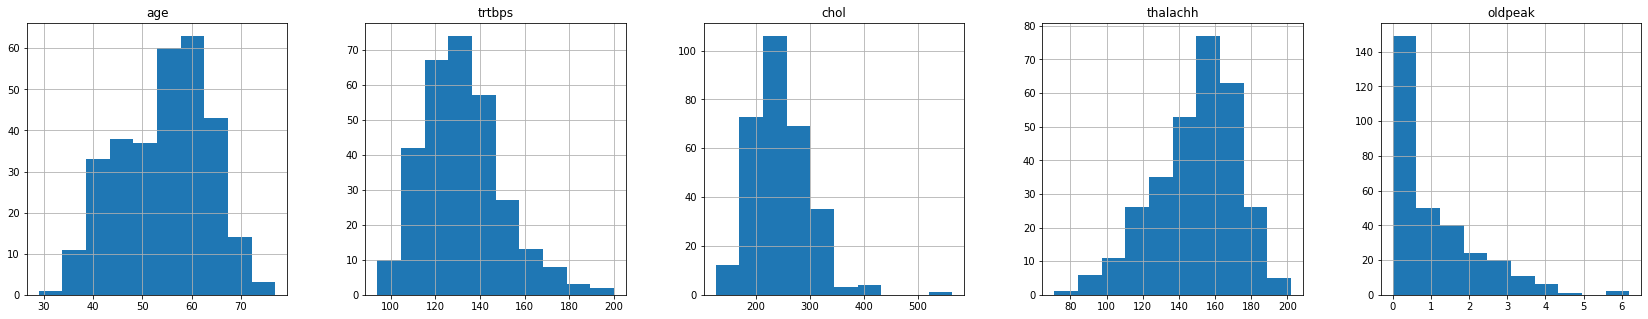

In [ ]:
# continuous fetures distrebutaiom by histograms
data[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']].hist(figsize=(35, 5), layout=(1,6))
pyplot.show()

# As we can see most of the fetures have a normal distribution 

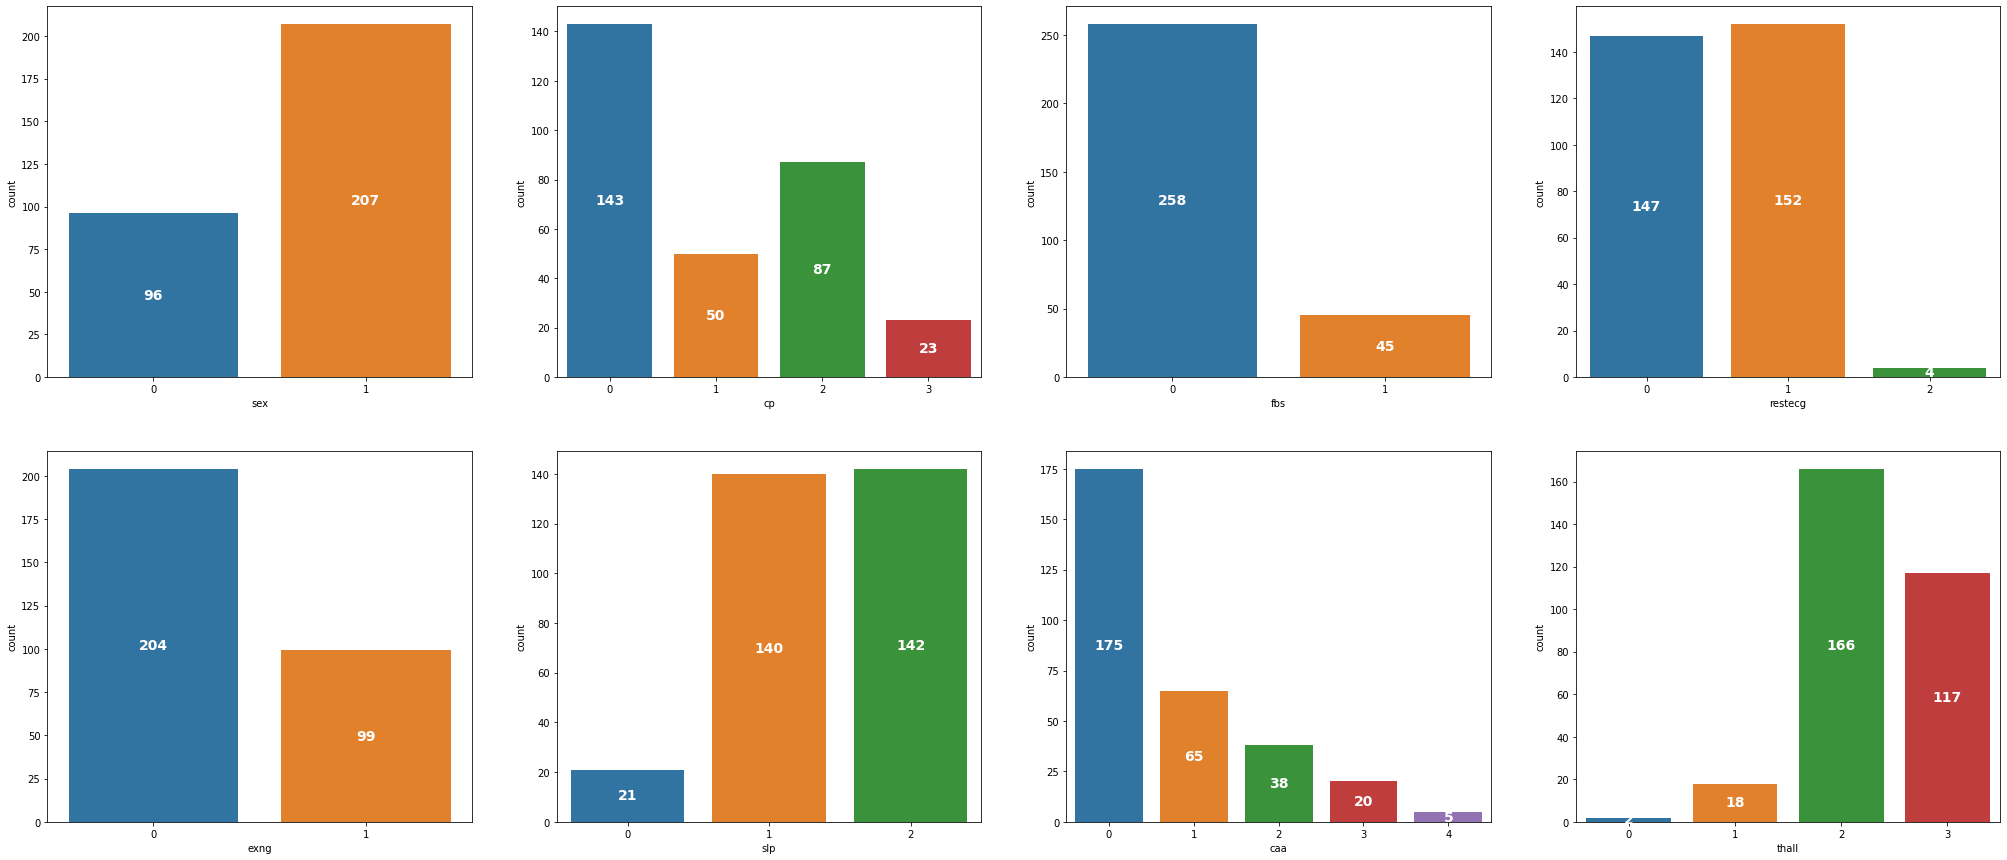

In [ ]:
# Count plot of categorical features
fig, ax = plt.subplots(2,4,figsize=(35,15))
sns.countplot(data['sex'], ax=ax[0][0])
sns.countplot(data['cp'], ax=ax[0][1])
sns.countplot(data['fbs'], ax=ax[0][2])
sns.countplot(data['restecg'], ax=ax[0][3])
sns.countplot(data['exng'], ax=ax[1][0])
sns.countplot(data['slp'], ax=ax[1][1])
sns.countplot(data['caa'], ax=ax[1][2])
sns.countplot(data['thall'], ax=ax[1][3])

for ax_r in ax:
  for ax_c in ax_r:
    for i, bar in enumerate(ax_c.patches):
        h = bar.get_height()
        ax_c.text(
            i, # bar index (x coordinate of text)
            h/2, # y coordinate of text
            '{}'.format(int(h)),  # y label
            ha='center', va='center', fontweight='bold', size=14, color='white')
    
fig.show()

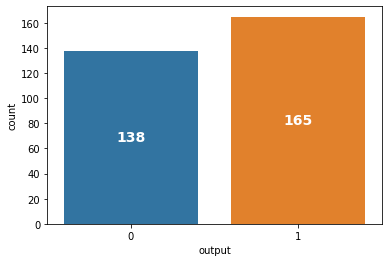

In [ ]:
# Count plot to label column
fig, ax = plt.subplots(1)
sns.countplot(data['output'])

for i, bar in enumerate(ax.patches):
    h = bar.get_height()
    ax.text(
        i, # bar index (x coordinate of text)
        h/2, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', va='center', fontweight='bold', size=14, color='white')

**Inspect correlation of continuous fetures**

In [ ]:
df_corr = data[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


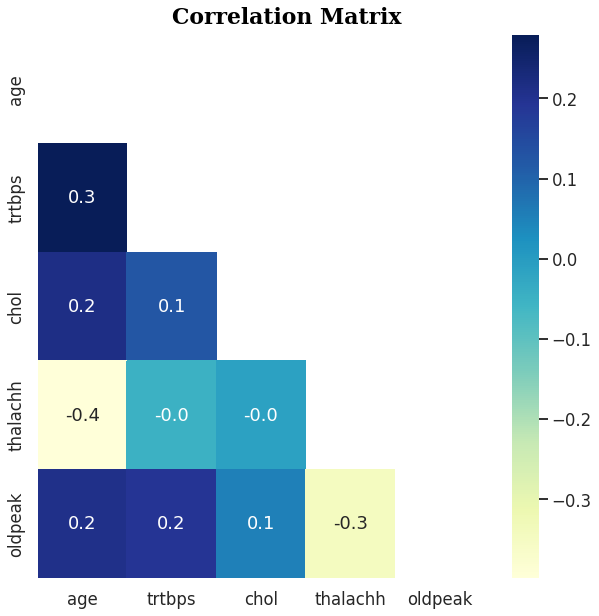

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = data[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

As we can above see there is no high correlation between the *features*

**Check if there is missing data**

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

***Scaling the data***

In [ ]:
from sklearn.preprocessing import RobustScaler

# Scale features using statistics that are robust to outliers.

# This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).

df = data
# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]


# defining the features and target
X = df.drop(['output'],axis=1) # features
y = df[['output']] # target

# encoding the categorical columns
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,0,0,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,0,0,2
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,2,0,2
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,2,0,2
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,2,0,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

The shape of X_train is  (242, 13)
The shape of X_test is  (61, 13)
The shape of y_train is  (242, 1)
The shape of y_test is  (61, 1)


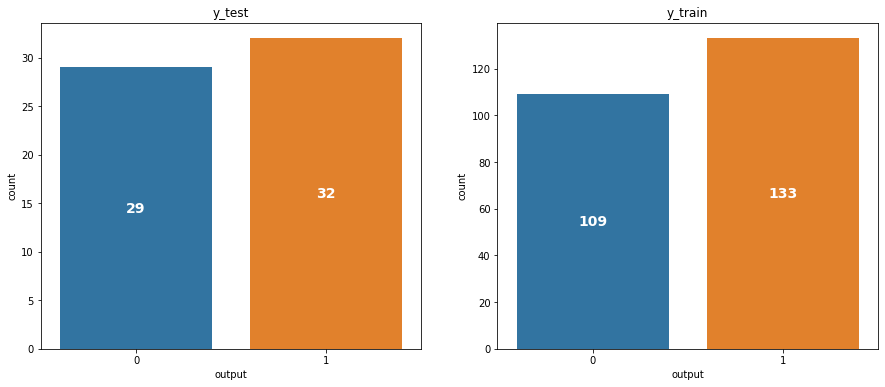

In [ ]:
# Count plot to label column
fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.countplot(y_test['output'], ax=ax[0]).set_title("y_test")
sns.countplot(y_train['output'], ax=ax[1]).set_title("y_train")

for i, bar in enumerate(ax[0].patches):
    h = bar.get_height()
    ax[0].text(
        i, # bar index (x coordinate of text)
        h/2, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', va='center', fontweight='bold', size=14, color='white')

for i, bar in enumerate(ax[1].patches):
    h = bar.get_height()
    ax[1].text(
        i, # bar index (x coordinate of text)
        h/2, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', va='center', fontweight='bold', size=14, color='white')

In [ ]:
feature_importances = np.mean([tree.feature_importances_ for tree in  BC.estimators_], axis=0)
feature_importances

array([0.08728664, 0.02909427, 0.13434435, 0.05476009, 0.08333354,
       0.00762307, 0.00716073, 0.06528168, 0.0786761 , 0.13664244,
       0.03766493, 0.18006862, 0.09806352])

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [ ]:
dt.tree_.node_count, dt.tree_.max_depth

(81, 9)

In [ ]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error


,train,test
accuracy,1.0,0.754098
precision,1.0,0.840000
recall,1.0,0.656250
f1,1.0,0.736842




> We can see that as we learned in class, in decision tree, there is a problem of overfitting. We cas see here because the pourcentage of success in the test set is really smaller that the train set.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [ ]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth


(85, 9)

In [ ]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

train_test_gr_error

,train,test
accuracy,1.0,0.819672
precision,1.0,0.956522
recall,1.0,0.687500
f1,1.0,0.800000




> When we use Grid Search and we find the best paramaters, we increase the success. But the results are not what we hoped for.
As we just see, decision trees tend to overfit. So we can use bagging to improve results.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

knn_predicted = knn.predict(X_test)
knn_train_predicted = knn.predict(X_train)


train_test_full_error = pd.concat([measure_error(y_train, knn_train_predicted, 'train'),
                              measure_error(y_test, knn_predicted, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.834711,0.868852
precision,0.816327,0.900000
recall,0.902256,0.843750
f1,0.857143,0.870968


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

BC = BaggingClassifier(n_estimators=40, base_estimator=SVC())
BC = BC.fit(X_train, y_train)

y_train_pred = BC.predict(X_train)
y_test_pred = BC.predict(X_test)
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.900826,0.868852
precision,0.881119,0.852941
recall,0.947368,0.906250
f1,0.913043,0.878788


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            max_depth=2,
                            warm_start=True,
                            random_state=42,
                            criterion="entropy")

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.194215
20.0,0.157025
30.0,0.169421
40.0,0.185950
50.0,0.190083
100.0,0.190083
150.0,0.181818
200.0,0.181818
300.0,0.185950


In [ ]:
y_train_pred_rf = RF.predict(X_train)
y_test_pred_rf = RF.predict(X_test)

train_test_rf_error = pd.concat([measure_error(y_train, y_train_pred_rf, 'train'),
                                 measure_error(y_test, y_test_pred_rf, 'test')],
                                axis=1)

train_test_rf_error

,train,test
accuracy,0.855372,0.868852
precision,0.822368,0.852941
recall,0.939850,0.906250
f1,0.877193,0.878788


In [ ]:
# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.227273
20.0,0.206612
30.0,0.206612
40.0,0.202479
50.0,0.194215
100.0,0.181818
150.0,0.194215
200.0,0.177686
300.0,0.190083


In [ ]:
y_train_pred_ef = EF.predict(X_train)
y_test_pred_ef = EF.predict(X_test)

train_test_ef_error = pd.concat([measure_error(y_train, y_train_pred_ef, 'train'),
                                 measure_error(y_test, y_test_pred_ef, 'test')],
                                axis=1)

train_test_ef_error

,train,test
accuracy,1.0,0.852459
precision,1.0,0.870968
recall,1.0,0.843750
f1,1.0,0.857143


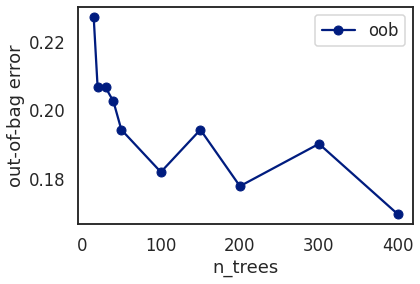

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = et_oob_df.plot(marker='o')
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

GNB = GaussianNB()
cv_N = 4

scores_gaussian = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores_gaussian)
np.mean(scores_gaussian)

[0.82894737 0.82894737 0.84210526 0.73333333]


0.8083333333333333

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluating_svm(kernel_type, X_train, y_train, X_test, y_test):
  kernel_type.fit(X_train, y_train)
  y_pred = kernel_type.predict(X_test)

  print("confusion matrix: ")
  print(confusion_matrix(y_test,y_pred))
  print()
  print("classification_report: ")
  print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
evaluating_svm(LSVC, X_train, y_train, X_test, y_test)

confusion matrix: 
[[25  4]
 [ 5 27]]

classification_report: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61





> We will also test different types of kernel.



In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='poly', degree=8)
evaluating_svm(svclassifier, X_train, y_train, X_test, y_test)

confusion matrix: 
[[22  7]
 [ 4 28]]

classification_report: 
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
# Gaussian
gammas = [.5, 1, 2, 10]
for gamma in gammas:
  svm_gaussian = SVC(kernel='rbf', gamma=gamma)
  print("gamma: " + str(gamma))
  evaluating_svm(svm_gaussian, X_train, y_train, X_test, y_test)

gamma: 0.5
confusion matrix: 
[[25  4]
 [ 5 27]]

classification_report: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

gamma: 1
confusion matrix: 
[[24  5]
 [ 5 27]]

classification_report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

gamma: 2
confusion matrix: 
[[ 4 25]
 [ 0 32]]

classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.14      0.24        29
           1       

In [ ]:
# Sigmoid
svm_sigmoid = SVC(kernel='sigmoid')
evaluating_svm(svm_sigmoid, X_train, y_train, X_test, y_test)

confusion matrix: 
[[25  4]
 [ 3 29]]

classification_report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression().fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations
lr_newton = LogisticRegression(solver="newton-cg").fit(X_train, y_train)

In [ ]:
lr_sag = LogisticRegression(solver="sag").fit(X_train, y_train)

In [ ]:
lr_saga = LogisticRegression(solver="saga").fit(X_train, y_train)

In [ ]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

In [ ]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2', 'newton', 'sag', 'saga']
coeff_models = [lr, lr_l1, lr_l2, lr_newton, lr_sag, lr_saga]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2,newton,sag,saga
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,1,1,1,1,1,1


In [ ]:
y_prob.head()

,lr,l1,l2,newton,sag,saga
0,0.897529,0.932976,0.932155,0.897530,0.897688,0.898249
1,0.689872,0.663461,0.660582,0.689870,0.689916,0.689995
2,0.824165,0.859603,0.859448,0.824159,0.824374,0.825046
3,0.974097,0.982966,0.983223,0.974098,0.974084,0.974055
4,0.946944,0.966908,0.967045,0.946944,0.946958,0.946983


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score

metrics = list()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              }, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

,lr,l1,l2,newton,sag,saga
precision,0.853076,0.853076,0.853076,0.853076,0.853076,0.853076
recall,0.852459,0.852459,0.852459,0.852459,0.852459,0.852459
fscore,0.852538,0.852538,0.852538,0.852538,0.852538,0.852538
accuracy,0.852459,0.852459,0.852459,0.852459,0.852459,0.852459




> In conclusion, naive bayes is the algorithm with the worst success. There is a lot of algorithm with a success of about 87%.

